In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H2full.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [3]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
5,2015,27
6,2015,27
7,2015,27
8,2015,27
9,2015,27


In [4]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
5        201527
6        201527
7        201527
8        201527
9        201527
10       201527
11       201527
12       201527
13       201527
14       201527
15       201527
16       201527
17       201527
18       201527
19       201527
20       201527
21       201527
22       201527
23       201527
24       201527
25       201527
26       201527
27       201527
28       201527
29       201527
          ...  
79299    201735
79300    201735
79301    201735
79302    201735
79303    201735
79304    201735
79305    201735
79306    201735
79307    201735
79308    201735
79310    201735
79311    201735
79312    201735
79313    201735
79314    201735
79315    201735
79316    201735
79317    201735
79318    201735
79319    201735
79320    201735
79321    201735
79322    201735
79323    201735
79324    201735
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: ob

In [5]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,0.0
7,1.0
8,1.0
9,1.0


In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [8]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
6,201527,0.0
10,201527,0.0
11,201527,0.0
12,201527,0.0
13,201527,0.0
15,201527,0.0
17,201527,0.0
18,201527,0.0
22,201527,0.0


In [9]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
201532,308.0
201533,428.0
201534,191.0
201535,212.0


In [10]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     97.0
201528    153.0
201529    228.0
201530    321.0
201531    159.0
201532    308.0
201533    428.0
201534    191.0
201535    212.0
201536    266.0
201537    331.0
201538    429.0
201539    414.0
201540    324.0
201541    391.0
201542    434.0
201543    150.0
201544    199.0
201545     67.0
201546     81.0
201547     41.0
201548    103.0
201549    169.0
201550    263.0
201551     21.0
201552     43.0
201553    181.0
201601     40.0
201602     35.0
201603     65.0
          ...  
201706    148.0
201707    295.0
201708    277.0
201709    301.0
201710    229.0
201711    353.0
201712    283.0
201713    226.0
201714    432.0
201715    447.0
201716    417.0
201717    568.0
201718    532.0
201719    385.0
201720    666.0
201721    407.0
201722    463.0
201723    456.0
201724    407.0
201725    374.0
201726    391.0
201727    298.0
201728    351.0
201729    222.0
201730    351.0
201731    253.0
201732    269.0
201733    341.0
201734    201.0
201735    129.0
Name: IsCancele

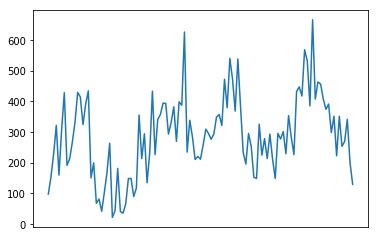

In [11]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [12]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
201532,308.0
201533,428.0
201534,191.0
201535,212.0


In [13]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:80], tseriesr[81:100]

In [14]:
type(val)

pandas.core.series.Series

In [15]:
train

FullDate
201528    153.0
201529    228.0
201530    321.0
201531    159.0
201532    308.0
201533    428.0
201534    191.0
201535    212.0
201536    266.0
201537    331.0
201538    429.0
201539    414.0
201540    324.0
201541    391.0
201542    434.0
201543    150.0
201544    199.0
201545     67.0
201546     81.0
201547     41.0
201548    103.0
201549    169.0
201550    263.0
201551     21.0
201552     43.0
201553    181.0
201601     40.0
201602     35.0
201603     65.0
201604    148.0
          ...  
201624    387.0
201625    626.0
201626    234.0
201627    338.0
201628    283.0
201629    210.0
201630    220.0
201631    211.0
201632    257.0
201633    309.0
201634    295.0
201635    276.0
201636    293.0
201637    348.0
201638    357.0
201639    321.0
201640    472.0
201641    379.0
201642    540.0
201643    473.0
201644    368.0
201645    538.0
201646    384.0
201647    233.0
201648    195.0
201649    295.0
201650    253.0
201651    152.0
201652    148.0
201653    325.0
Name: IsCancele

In [16]:
val

FullDate
201702    278.0
201703    213.0
201704    293.0
201705    211.0
201706    148.0
201707    295.0
201708    277.0
201709    301.0
201710    229.0
201711    353.0
201712    283.0
201713    226.0
201714    432.0
201715    447.0
201716    417.0
201717    568.0
201718    532.0
201719    385.0
201720    666.0
Name: IsCanceled, dtype: float64

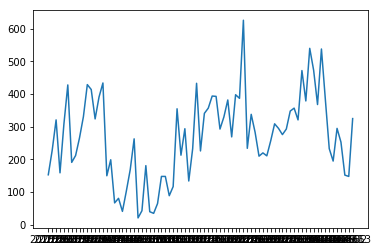

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

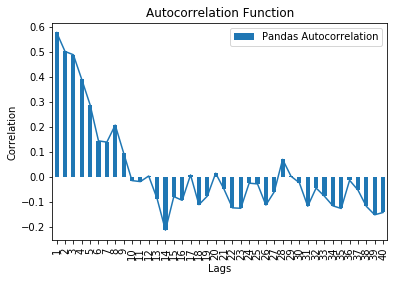

In [18]:
#Autocorrelation Plot
acf_1 =  acf(train)[1:50]
val_df = pd.DataFrame([acf_1]).T
val_df.columns = ['Pandas Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [19]:
acf_1

array([ 0.57682569,  0.50102825,  0.48783442,  0.38911865,  0.28749014,
        0.14347525,  0.13845609,  0.20647123,  0.09543422, -0.01532162,
       -0.01949013,  0.00295344, -0.08714255, -0.21361621, -0.07932248,
       -0.09418838,  0.00732071, -0.11172859, -0.07741976,  0.01403797,
       -0.04999613, -0.12427111, -0.12616096, -0.02565199, -0.02869097,
       -0.11310648, -0.06031756,  0.06947717,  0.00204902, -0.02404939,
       -0.11781334, -0.04500863, -0.07799972, -0.11624471, -0.12687692,
       -0.01416571, -0.05323403, -0.1182098 , -0.15217874, -0.14281422])

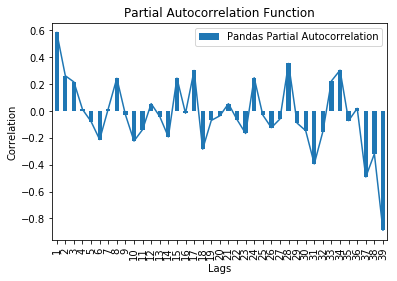

In [20]:
#Partial Autocorrelation Plot
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [21]:
pacf_1

array([ 0.5842209 ,  0.26223107,  0.21573143,  0.01189639, -0.07843622,
       -0.21261607,  0.01648512,  0.24328135, -0.02710635, -0.22364443,
       -0.13830762,  0.05450444, -0.04117697, -0.19265721,  0.2444511 ,
       -0.01668242,  0.30164693, -0.28390422, -0.07043485, -0.03570086,
        0.0544023 , -0.0639319 , -0.16727779,  0.24730303, -0.02973084,
       -0.12405868, -0.05959775,  0.35373697, -0.09018903, -0.14640566,
       -0.39377109, -0.15330695,  0.22351772,  0.30356455, -0.07185584,
        0.01957683, -0.49110331, -0.3190555 , -0.88703165])

In [22]:
#Dickey-Fuller Test
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.793269
p-value: 0.383808
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


In [23]:
# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=343.356, BIC=345.872, Fit time=0.140 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=343.198, BIC=346.972, Fit time=0.560 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=341.033, BIC=346.066, Fit time=1.089 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=345.584, BIC=353.133, Fit time=1.959 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=341.640, BIC=345.414, Fit time=0.646 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=343.621, BIC=349.912, Fit time=1.369 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=342.822, BIC=349.112, Fit time=1.905 seconds
Total fit time: 7.687 seconds


In [25]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 52)   Log Likelihood                -166.517
Date:                            Fri, 25 Oct 2019   AIC                            341.033
Time:                                    16:07:15   BIC                            346.066
Sample:                                         0   HQIC                           342.482
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5232      3.763      1.202      0.229      -2.851      11.898
ar.L1          0.4276      0.361      1.185      0.236      -0.279       1.135
ma.L1         -0.9972      7.522     -0.133      0.895     -15.739      13.745
sigma2       1.95e+04   1.47e+05      0.133      0.894   -2.68e+05    3.07e+05
===================================================================================
Ljung-Box (Q):                       21.85   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.64   Prob(JB):                         0.19
Heteroskedasticity (H):               1.35   Skew:                             0.88
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [27]:
prediction

,Predicted_Cancellations
FullDate,
201702,281.583449
201703,299.681662
201704,382.116286
201705,386.397803
201706,333.751613
201707,368.991433
201708,614.610068
201709,480.390665
201710,569.240510


In [28]:
val

FullDate
201702    278.0
201703    213.0
201704    293.0
201705    211.0
201706    148.0
201707    295.0
201708    277.0
201709    301.0
201710    229.0
201711    353.0
201712    283.0
201713    226.0
201714    432.0
201715    447.0
201716    417.0
201717    568.0
201718    532.0
201719    385.0
201720    666.0
Name: IsCanceled, dtype: float64

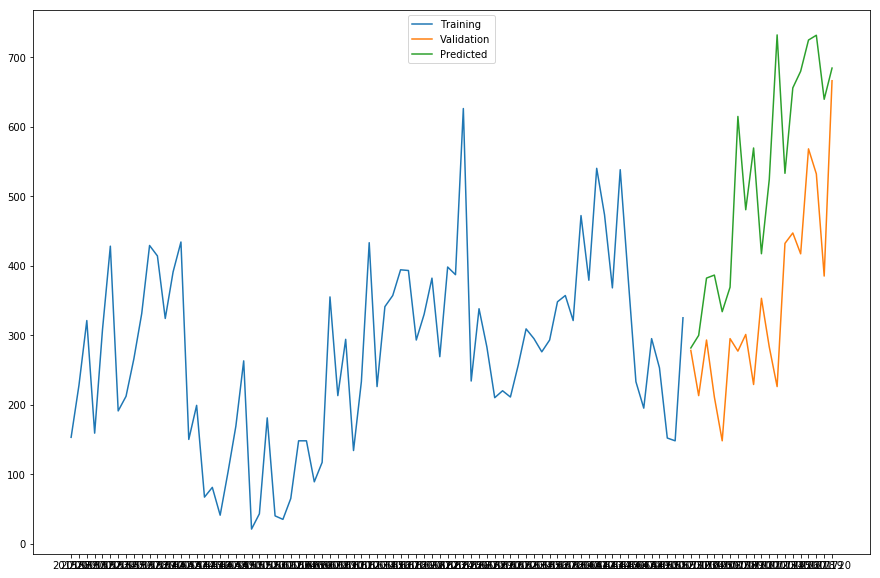

In [29]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [30]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [31]:
type(predictions)

pandas.core.series.Series

In [32]:
mda(val, predictions)

0.8947368421052632

In [33]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 219.836919


In [34]:
test = np.array([[407,463,456,407,374,391,298,351,222,351,253,269,341,201,129]])
test.shape

(1, 15)

In [35]:
test=test.reshape(-1)
test

array([407, 463, 456, 407, 374, 391, 298, 351, 222, 351, 253, 269, 341,
       201, 129])

In [36]:
test.shape

(15,)

In [37]:
test = pd.Series(test)

In [38]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=15), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cancellations']
predictionsnew=predictionnew['Unseen_Predicted_Cancellations']

In [39]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE: %f' % rmse_new)

RMSE: 274.077798


In [40]:
mda(test, predictionsnew)

0.8666666666666667

In [41]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

0    -125.416551
1    -163.318338
2     -73.883714
3     -20.602197
4     -40.248387
5     -22.008567
6     316.610068
7     129.390665
8     347.240510
9      66.119962
10    271.012071
11    462.909593
12    191.809429
13    454.710254
14    550.611502
dtype: float64

In [42]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

156.32908677586752

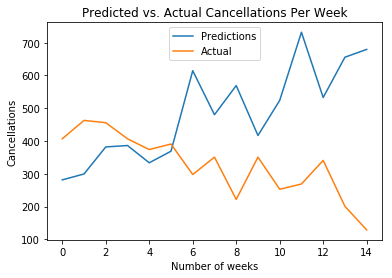

In [43]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()